<a href="https://colab.research.google.com/github/AhmedThahir/Attendance_Animation/blob/main/Attendance_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

from matplotlib.animation import FuncAnimation, writers

import seaborn as sns
sns.set_theme() # affects all matplotlib and seaborn plots
plt.style.use('ggplot')

In [10]:
def gsheet(spreadsheet_id, sheet_id=None, sheet_name=None):
    # make sure the spreadsheet is publicly viewable
    if sheet_id is not None:
        return f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/gviz/tq?tqx=out:csv&gid={sheet_id}"
    elif sheet_name is not None:
        return f"https://docs.google.com/spreadsheets/d/{spreadsheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
    else:
        return None

df = pd.read_csv(gsheet("1BnzmkWo0EH8subvl_g7FQZ_6Nc8MaiA81gQ25HEfHM0", sheet_id=1763572421))
# attendance = pd.read_csv(gsheet("1BnzmkWo0EH8subvl_g7FQZ_6Nc8MaiA81gQ25HEfHM0", sheet_name = "Attendance_Animation"))

In [11]:
df = df.dropna()
df

,Date_Code,Date,Event,Name,Unnamed: 4,Date_Code.1,Date.1,Count,Cumulative Count


<ipython-input-12-bd7afb871e15>:18: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xmin=0, xmax=(len(y_values)-1)*1.1)
<ipython-input-12-bd7afb871e15>:19: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin=0, ymax=max(y_values)*1.1)


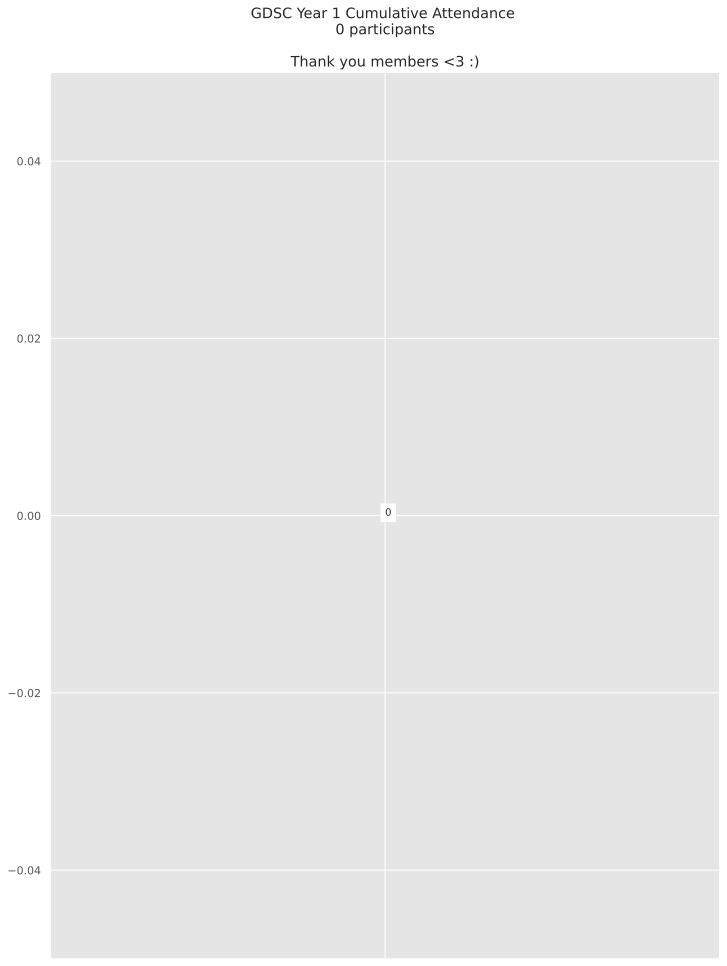

In [12]:
# hyperparameters
x_values = range(1+df["Cumulative Count"].count())
y_values = [0] + list(df["Cumulative Count"])
duration = 3 # seconds
res_w, res_h = 2000, 2000 # video_resolution
aspect_w, aspect_h = (12, 16) # aspect_ratio

# plot
no_of_frames = len(y_values)
fig = plt.figure(
    figsize = (aspect_w, aspect_h), # inches
    dpi = res_w/16 # 
)
plt.tight_layout()
ax = plt.gca()  # Get current axes
ax.set_xticks(x_values, [""] + list(df["Date"]))
ax.set_title(f"GDSC Year 1 Cumulative Attendance \n{max(y_values)} participants\n\nThank you members <3 :)")
ax.set_xlim(xmin=0, xmax=(len(y_values)-1)*1.1)
ax.set_ylim(ymin=0, ymax=max(y_values)*1.1)
line, = ax.plot(0, 0)

import time
def animation_frame(i):
  # avoid changing axes, titles, etc in updates: low fps issue
  # ax.set_title(y_values[i])
  plt.text(x=i, y=y_values[i], s=y_values[i], backgroundcolor="white")
  line.set_xdata(x_values[:i+1])
  line.set_ydata(y_values[:i+1])

  return line, 

interval = (duration  * 1000)/no_of_frames #ms
fps = 1000 / interval

animation = FuncAnimation(fig, func=animation_frame, frames=no_of_frames, interval=interval)

# setting up writer object
Writer = writers['ffmpeg']
writer = Writer(fps=fps, metadata={'artist': 'Me'}, bitrate=5000)

animation.save('Line Graph Animation.gif', writer)
# animation.save('Line Graph Animation.mp4', writer)